# In this Notebook the venues of Madrid are getting from Foursquare API

In [5]:
import pandas as pd
import folium

# Import previous data

In [6]:
#stations
train_stations = pd.read_csv('train_stations.csv').iloc[:,1:]
metro_stations = pd.read_csv('metro_stations.csv').iloc[:,1:]

In [7]:
#join metro and train stations
stations  = pd.concat([metro_stations,train_stations])
print(stations.shape)
stations.head()

(519, 4)


,station,line,Latitude,Longitude
0,ALTO DEL ARENAL,1,40.389770,-3.645225
1,ALVARADO,1,40.450333,-3.703318
2,ANTON MARTIN,1,40.412464,-3.699376
3,ATOCHA,1,40.408848,-3.692491
4,ATOCHA RENFE,1,40.406586,-3.689380


Drop duplicated stations

In [8]:
stations.drop_duplicates(subset ="station", 
                     keep = 'first', inplace=True)
print(stations.shape)

(317, 4)


## Map of all the stations

In [145]:
# create map of Madrid using latitude and longitude mean values
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

mapi = folium.Map(location=[stations.Latitude.mean(), stations.Longitude.mean()], 
                  zoom_start=11,
                  control_scale = True)
folium.TileLayer('cartodbpositron', attr='igs').add_to(mapi)

# set color scheme for the clusters
n = len(stations['line'].unique())
x = np.arange(n)
perro = dict(zip(stations['line'].unique(),x))
ys = [i + x + (i*x)**2 for i in range(n)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, line in zip(stations['Latitude'], 
                                  stations['Longitude'], 
                                  stations['station'], 
                                  stations['line']):
    label = folium.Popup(str(poi) + ' Line ' + str(line), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[perro[line]-1],
        fill=True,
        fill_color=rainbow[int(perro[line])-1],
        fill_opacity=0.7).add_to(mapi)
       
mapi

## shape

In [17]:
stations.shape

## Foursquare Analysis

In [9]:
CLIENT_ID = 'LMSBMJJP4OW4TX0OGZOZLIBNWRZGPAE21WLWDZYPJPBQTK5Z' # your Foursquare ID
CLIENT_SECRET = 'UDCGEDKOD1FETOKSWXQJBHCOASQRRHBUKTKMPNXW02PW4XVJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LMSBMJJP4OW4TX0OGZOZLIBNWRZGPAE21WLWDZYPJPBQTK5Z
CLIENT_SECRET:UDCGEDKOD1FETOKSWXQJBHCOASQRRHBUKTKMPNXW02PW4XVJ


In [10]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Venues for each station

In [151]:
madrid_venues = getNearbyVenues(stations['station'] + '/' + stations['line'], 
                                 stations['Latitude'], 
                                 stations['Longitude'], 
                                 radius=500)

ALTO DEL ARENAL/1
ALVARADO/1
ANTON MARTIN/1
ATOCHA/1
ATOCHA RENFE/1
BAMBU/1
BILBAO/1
BUENOS AIRES/1
CHAMARTIN/1
CONGOSTO/1
CUATRO CAMINOS/1
ESTRECHO/1
GRAN VIA/1
IGLESIA/1
LA GAVIA/1
LAS SUERTES/1
MENENDEZ PELAYO/1
MIGUEL HERNANDEZ/1
NUEVA NUMANCIA/1
PACIFICO/1
PINAR DE CHAMARTIN/1
PLAZA DE CASTILLA/1
PORTAZGO/1
PUENTE DE VALLECAS/1
RIOS ROSAS/1
SIERRA DE GUADALUPE/1
SOL/1
TETUAN/1
TIRSO DE MOLINA/1
TRIBUNAL/1
VALDEACEDERAS/1
VALDECARROS/1
VILLA DE VALLECAS/1
ALONSO MARTINEZ/10A
AVIACION ESPAÑOLA/10A
BATAN/10A
BEGOÑA/10A
CASA DE CAMPO/10A
COLONIA JARDIN/10A
CUATRO VIENTOS/10A
CUZCO/10A
FUENCARRAL/10A
GREGORIO MARAÑON/10A
JOAQUIN VILUMBRALES/10A
LAGO/10A
NUEVOS MINISTERIOS/10A
PLAZA DE ESPAÑA/10A
PRINCIPE PIO/10A
PUERTA DEL SUR/10A
SANTIAGO BERNABEU/10A
TRES OLIVOS/10A
BAUNATAL/10B
HOSPITAL INFANTA SOFIA/10B
LA GRANJA/10B
LA MORALEJA/10B
LAS TABLAS/10B
MANUEL DE FALLA/10B
MARQUES DE LA VALDAVIA/10B
MONTECARMELO/10B
REYES CATOLICOS/10B
RONDA DE LA COMUNICACION/10B
ABRANTES/11
CARABANCHEL

In [152]:
print(madrid_venues.shape)
madrid_venues = madrid_venues.rename(columns={'Neighborhood':'stations',
                              'Neighborhood Latitude':'stations Latitude',
                              'Neighborhood Longitude':'stations Longitude'})
madrid_venues.head()

(8616, 7)


,stations,stations Latitude,stations Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALTO DEL ARENAL/1,40.389769,-3.645225,Stones Rock Bar,40.391972,-3.649905,Bar
1,ALTO DEL ARENAL/1,40.389769,-3.645225,Calle Pedro Laborde,40.388294,-3.648227,Building
2,ALTO DEL ARENAL/1,40.389769,-3.645225,AhorraMas,40.391022,-3.643129,Grocery Store
3,ALTO DEL ARENAL/1,40.389769,-3.645225,Restaurante chino Jardín de bambú,40.388884,-3.642610,Chinese Restaurant
4,ALTO DEL ARENAL/1,40.389769,-3.645225,Jardin Bambu,40.388602,-3.641056,Asian Restaurant


### Venues around gyms

In [13]:
gym_venues = getNearbyVenues(geo_gym['name'], 
                                 geo_gym['lat'], 
                                 geo_gym['lon'], 
                                 radius=500)

place1
place2
place3


In [15]:
print(gym_venues.shape)
gym_venues = gym_venues.rename(columns={'Neighborhood':'gym',
                              'Neighborhood Latitude':'gym Latitude',
                              'Neighborhood Longitude':'gym Longitude'})
gym_venues.head()

(106, 7)


,gym,gym Latitude,gym Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,place1,40.433487,-3.645917,Docamar,40.433501,-3.648133,Tapas Restaurant
1,place1,40.433487,-3.645917,El Callejón de Álvarez Gato,40.436425,-3.644408,Bar
2,place1,40.433487,-3.645917,Las Farolas,40.434546,-3.645646,Coffee Shop
3,place1,40.433487,-3.645917,Granier Panes Artesanos,40.435455,-3.643282,Bakery
4,place1,40.433487,-3.645917,Taberna Balkanika,40.433097,-3.645560,Restaurant


### Save data

In [153]:
#it is important nto save this, because we do not want to use FourSquare again to get the data
gym_venues.to_csv('gym_venues.csv')
madrid_venues.to_csv('madrid_stations_venues.csv')

In [16]:
gym_venues.to_csv('gym_venues.csv')

### Load data

In [87]:
madrid_venues = pd.read_csv('madrid_stations_venues.csv')

remove stations and metro 

In [154]:
madrid_venues = madrid_venues[madrid_venues['Venue Category'] != 'Train Station']
madrid_venues = madrid_venues[madrid_venues['Venue Category'] != 'Metro Station']
madrid_venues.shape

(8443, 7)

### Venues by station

In [155]:
madrid_venues.groupby('stations').count()\
    .sort_values(by='Venue', ascending=False)\
    .reset_index().iloc[:,0:2].rename(columns = {'stations Latitude':'n'})


,stations,n
0,SAN BERNARDO/2,100
1,RECOLETOS/C-1,100
2,TIRSO DE MOLINA/1,100
3,EMBAJADORES/3,100
4,NUÑEZ DE BALBOA/5,100
5,BANCO DE ESPAÑA/2,100
6,OPERA/2,100
7,GOYA/2,100
8,GRAN VIA/1,100
9,QUEVEDO/2,100


Minimum 10 values

In [157]:
venues_per_station = madrid_venues.groupby('stations').count()\
    .sort_values(by='Venue', ascending=False)\
    .reset_index().iloc[:,0:2].rename(columns = {'stations Latitude':'n'})

moreten_venues = venues_per_station[venues_per_station['n'] > 9]

In [158]:
stations_indexes = moreten_venues['stations'].values
madrid_venues = madrid_venues[madrid_venues['stations'].isin(stations_indexes)]

remove repeated stations

In [159]:
print(madrid_venues.shape)
madrid_venues.head()

(7781, 7)


,stations,stations Latitude,stations Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,ALVARADO/1,40.450331,-3.703318,Piccola Napoli,40.449726,-3.701362,Pizza Place
7,ALVARADO/1,40.450331,-3.703318,Mercado de Maravillas,40.449064,-3.702580,Farmers Market
8,ALVARADO/1,40.450331,-3.703318,La Miguiña,40.451368,-3.701523,Bakery
9,ALVARADO/1,40.450331,-3.703318,Restaurante Dadam,40.450156,-3.701950,Korean Restaurant
10,ALVARADO/1,40.450331,-3.703318,Naomi Japonés,40.452676,-3.700561,Japanese Restaurant


In [160]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 299 uniques categories.


## Analize each station

We will prepare a dataset with all categories in columns and the row will mark one or zero in each case.

In [161]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")
cols = list(madrid_onehot.columns)
madrid_onehot.shape

(7781, 299)

In [162]:
cols = list(madrid_onehot.columns)
madrid_onehot['station'] = madrid_venues.stations
madrid_onehot = madrid_onehot[['station'] + cols]
madrid_onehot.head()

,station,Accessories Store,Adult Boutique,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
6,ALVARADO/1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ALVARADO/1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ALVARADO/1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,ALVARADO/1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,ALVARADO/1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Grouped by station

In [163]:
madrid_onehot_grouped = madrid_onehot.groupby('station').mean().reset_index()
madrid_onehot_grouped.head()

,station,Accessories Store,Adult Boutique,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,ACACIAS/5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.029412,0.0,0.0
1,AEROPUERTO T1 T2 T3/8,0.029412,0.0,0.058824,0.088235,0.117647,0.117647,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,AEROPUERTO T4/8,0.030303,0.0,0.000000,0.060606,0.121212,0.030303,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.030303,0.000000,0.0,0.0
3,"AGUILAS, LAS/C-5",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,ALAMEDA DE OSUNA/5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [164]:
madrid_onehot_grouped.shape

(196, 300)

In [165]:
num_top_venues = 10

def print_most_common_list(data_grouped, hood, num_top):
    print("----"+hood+"----")
    temp = data_grouped[data_grouped['station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top))
    print('\n')
    
for hood in madrid_onehot_grouped['station']:
    print_most_common_list(madrid_onehot_grouped, hood, num_top_venues)

----ACACIAS/5----
                venue  freq
0    Tapas Restaurant  0.09
1         Art Gallery  0.09
2  Spanish Restaurant  0.06
3         Pizza Place  0.06
4                 Bar  0.06
5       Grocery Store  0.03
6              Bakery  0.03
7           Bookstore  0.03
8      Gymnastics Gym  0.03
9             Theater  0.03


----AEROPUERTO T1 T2 T3/8----
                 venue  freq
0      Airport Service  0.12
1     Airport Terminal  0.12
2       Duty-free Shop  0.09
3       Airport Lounge  0.09
4  Rental Car Location  0.09
5                 Café  0.09
6         Airport Gate  0.06
7          Coffee Shop  0.03
8            Cafeteria  0.03
9   Frozen Yogurt Shop  0.03


----AEROPUERTO T4/8----
                  venue  freq
0       Airport Service  0.12
1    Spanish Restaurant  0.09
2           Coffee Shop  0.09
3           Bus Station  0.06
4        Airport Lounge  0.06
5         Deli / Bodega  0.06
6  Fast Food Restaurant  0.06
7        Police Station  0.03
8          Gourmet Shop  0.

                 venue  freq
0   Spanish Restaurant  0.12
1          Supermarket  0.09
2    Indian Restaurant  0.07
3                Hotel  0.07
4   Seafood Restaurant  0.05
5               Bakery  0.05
6  Japanese Restaurant  0.05
7           Restaurant  0.05
8          Coffee Shop  0.05
9                 Café  0.05


----AVENIDA DE LA PAZ/4----
                   venue  freq
0     Spanish Restaurant  0.19
1                    Bar  0.12
2     Chinese Restaurant  0.12
3  Portuguese Restaurant  0.06
4             Smoke Shop  0.06
5            Supermarket  0.06
6             Restaurant  0.06
7      Indian Restaurant  0.06
8       Lottery Retailer  0.06
9      Convenience Store  0.06


----BANCO DE ESPAÑA/2----
                      venue  freq
0                     Hotel  0.16
1                Restaurant  0.10
2        Spanish Restaurant  0.08
3                     Plaza  0.07
4       Japanese Restaurant  0.04
5  Mediterranean Restaurant  0.03
6                       Bar  0.03
7         

                  venue  freq
0        Clothing Store   0.1
1  Gym / Fitness Center   0.1
2    Spanish Restaurant   0.1
3          Burger Joint   0.1
4      Basketball Court   0.1
5                  Café   0.1
6           Supermarket   0.1
7      Video Game Store   0.1
8         Shopping Mall   0.1
9             Pet Store   0.1


----CIUDAD LINEAL/5----
                  venue  freq
0      Tapas Restaurant  0.18
1        Clothing Store  0.09
2    Spanish Restaurant  0.09
3                   Bar  0.06
4  Fast Food Restaurant  0.06
5      Asian Restaurant  0.03
6             Multiplex  0.03
7               Brewery  0.03
8      Toy / Game Store  0.03
9        Sandwich Place  0.03


----COLOMBIA/8----
                         venue  freq
0           Spanish Restaurant  0.20
1                   Restaurant  0.10
2                          Bar  0.08
3                Grocery Store  0.07
4                        Plaza  0.03
5          Japanese Restaurant  0.03
6                        Diner  0.

                venue  freq
0    Tapas Restaurant  0.14
1          Restaurant  0.14
2    Asian Restaurant  0.09
3       Grocery Store  0.05
4  Seafood Restaurant  0.05
5        Cocktail Bar  0.05
6                Café  0.05
7               Hotel  0.05
8              Bakery  0.05
9  Athletics & Sports  0.05


----GETAFE CENTRAL/12----
                      venue  freq
0                      Café  0.26
1                     Plaza  0.11
2      Fast Food Restaurant  0.05
3  Mediterranean Restaurant  0.05
4        Frozen Yogurt Shop  0.05
5            Breakfast Spot  0.05
6               Snack Place  0.05
7              Cocktail Bar  0.05
8                   Theater  0.05
9                    Bakery  0.05


----GETAFE CENTRO/C-4A----
                      venue  freq
0                      Café  0.28
1                     Plaza  0.11
2      Fast Food Restaurant  0.06
3               Snack Place  0.06
4            Sandwich Place  0.06
5        Mexican Restaurant  0.06
6  Mediterranean Restau

                venue  freq
0                Park  0.18
1  Spanish Restaurant  0.09
2    Tapas Restaurant  0.09
3         Coffee Shop  0.09
4          Skate Park  0.09
5         Pizza Place  0.09
6            Boutique  0.09
7    Sushi Restaurant  0.09
8         Supermarket  0.09
9      Clothing Store  0.09


----LAS TABLAS/10B----
                   venue  freq
0           Burger Joint  0.10
1     Spanish Restaurant  0.10
2             Playground  0.05
3             Restaurant  0.05
4            Pizza Place  0.05
5               Pharmacy  0.05
6            Coffee Shop  0.02
7                    Gym  0.02
8  Portuguese Restaurant  0.02
9                   Café  0.02


----LAVAPIES/3----
                venue  freq
0                 Bar  0.12
1                Café  0.06
2          Restaurant  0.06
3    Tapas Restaurant  0.06
4  Spanish Restaurant  0.06
5         Coffee Shop  0.04
6             Theater  0.04
7         Pizza Place  0.03
8         Art Gallery  0.03
9      Breakfast Spot  0.

                    venue  freq
0                   Hotel  0.07
1                    Café  0.05
2                     Bar  0.05
3               Bookstore  0.04
4            Cocktail Bar  0.04
5                 Theater  0.04
6  Argentinian Restaurant  0.04
7                  Hostel  0.04
8                   Plaza  0.03
9        Tapas Restaurant  0.03


----NUEVA NUMANCIA/1----
                       venue  freq
0               Burger Joint  0.06
1                Supermarket  0.06
2                Pizza Place  0.06
3                     Bakery  0.06
4                        Pub  0.06
5                       Café  0.03
6  South American Restaurant  0.03
7                Snack Place  0.03
8         Spanish Restaurant  0.03
9              Grocery Store  0.03


----NUEVOS MINISTERIOS/10A----
                 venue  freq
0   Spanish Restaurant  0.07
1       Clothing Store  0.07
2     Tapas Restaurant  0.07
3          Coffee Shop  0.06
4           Restaurant  0.06
5                  Bar  0.05


                   venue  freq
0            Pizza Place  0.12
1              Rock Club  0.06
2                Brewery  0.06
3   Gym / Fitness Center  0.06
4   Fast Food Restaurant  0.06
5                    Gym  0.06
6          Grocery Store  0.06
7           Concert Hall  0.06
8         Soccer Stadium  0.06
9  Performing Arts Venue  0.06


----PRADILLO/12----
                  venue  freq
0    Spanish Restaurant  0.19
1        Sandwich Place  0.12
2                Bakery  0.12
3           Pizza Place  0.12
4  Fast Food Restaurant  0.06
5   American Restaurant  0.06
6                   Bar  0.06
7                 Plaza  0.06
8           Art Gallery  0.06
9             Bookstore  0.06


----PRINCIPE DE VERGARA/2----
                venue  freq
0          Restaurant  0.17
1  Spanish Restaurant  0.16
2    Tapas Restaurant  0.05
3        Burger Joint  0.05
4  Italian Restaurant  0.05
5              Bakery  0.04
6      Ice Cream Shop  0.04
7                Café  0.03
8   Indian Restaurant  

                    venue  freq
0    Fast Food Restaurant   0.2
1              Restaurant   0.1
2                Pharmacy   0.1
3            Soccer Field   0.1
4           Grocery Store   0.1
5             Pizza Place   0.1
6         Bed & Breakfast   0.1
7             Supermarket   0.1
8  Furniture / Home Store   0.1
9    Other Great Outdoors   0.0


----SAN JOSE DE VALDERAS/C-5----
                  venue  freq
0      Department Store  0.17
1                  Café  0.17
2  Gym / Fitness Center  0.08
3              Pharmacy  0.08
4           Supermarket  0.08
5            Bagel Shop  0.08
6         Big Box Store  0.08
7            Restaurant  0.08
8                  Park  0.08
9           Pizza Place  0.08


----SAN LORENZO/4----
                venue  freq
0  Spanish Restaurant  0.33
1              Garden  0.07
2                Food  0.07
3                Café  0.07
4         Supermarket  0.07
5             Brewery  0.07
6        Gourmet Shop  0.07
7                 Bar  0.07
8      

                  venue  freq
0  Fast Food Restaurant  0.20
1         Grocery Store  0.20
2        Breakfast Spot  0.10
3    Spanish Restaurant  0.05
4                   Bar  0.05
5           Comedy Club  0.05
6      Tapas Restaurant  0.05
7     Convenience Store  0.05
8           Pizza Place  0.05
9               Brewery  0.05




### Let's put that into a pandas dataframe

In [166]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['station'] = madrid_onehot_grouped['station']

for ind in np.arange(madrid_onehot_grouped.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_onehot_grouped.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS/5,Tapas Restaurant,Art Gallery,Pizza Place,Bar,Spanish Restaurant,Bakery,Theater,Park,Liquor Store,Market
1,AEROPUERTO T1 T2 T3/8,Airport Service,Airport Terminal,Airport Lounge,Duty-free Shop,Café,Rental Car Location,Airport Gate,Accessories Store,Coffee Shop,Cafeteria
2,AEROPUERTO T4/8,Airport Service,Spanish Restaurant,Coffee Shop,Bus Station,Airport Lounge,Fast Food Restaurant,Deli / Bodega,Convenience Store,Shop & Service,Clothing Store
3,"AGUILAS, LAS/C-5",Spanish Restaurant,Bar,Shopping Mall,Restaurant,Smoke Shop,Café,Tapas Restaurant,Seafood Restaurant,Park,Gym Pool
4,ALAMEDA DE OSUNA/5,Bakery,Restaurant,Hotel,Smoke Shop,Spanish Restaurant,Pizza Place,Cocktail Bar,Chinese Restaurant,Scenic Lookout,Shop & Service


## Clustering

In [167]:
# set number of clusters
kclusters = 5

madrid_grouped_clustering = madrid_onehot_grouped.drop('station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 0, 4, 3, 0, 0, 4, 2, 3])

Insert cluster labels

In [168]:
# add clustering labels
stations_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = stations.iloc[:,1:]
madrid_merged['station'] = stations['station'] + '/' + stations['line']

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(stations_venues_sorted.set_index('station'), on='station')

madrid_merged.head() # check the last columns!

,line,Latitude,Longitude,station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,40.389769,-3.645225,ALTO DEL ARENAL/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,40.450331,-3.703318,ALVARADO/1,3.0,Spanish Restaurant,Restaurant,Seafood Restaurant,Grocery Store,Bakery,Bar,Pizza Place,Hotel,Middle Eastern Restaurant,Mexican Restaurant
2,1,40.412463,-3.699376,ANTON MARTIN/1,3.0,Spanish Restaurant,Hotel,Restaurant,Bar,Theater,Café,Tapas Restaurant,Jazz Club,Mexican Restaurant,Bookstore
3,1,40.408847,-3.692491,ATOCHA/1,3.0,Restaurant,Spanish Restaurant,Hotel,Café,Garden,Bar,Museum,Italian Restaurant,Plaza,Sandwich Place
4,1,40.406586,-3.689380,ATOCHA RENFE/1,3.0,Hotel,Spanish Restaurant,Restaurant,Grocery Store,Sandwich Place,Museum,Garden,Tapas Restaurant,Bookstore,Art Museum


In [169]:
madrid_merged = madrid_merged.dropna().astype({'Cluster Labels':'int32'})

In [170]:
madrid_merged.shape

(196, 15)

## Visualizing the clusters

In [178]:
# create map of Toronto using latitude and longitude mean values
map_clusters = folium.Map(location=[madrid_merged.Latitude.mean(), madrid_merged.Longitude.mean()], 
                          zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], 
                                  madrid_merged['Longitude'], 
                                  madrid_merged['station'], 
                                  madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine the clusters

### Cluster 1

In [182]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, 
                   madrid_merged.columns[[3] + list(range(5, madrid_merged.shape[1]))]]

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,BUENOS AIRES/1,Bar,Pizza Place,Grocery Store,Electronics Store,Big Box Store,Fast Food Restaurant,Restaurant,Gym / Fitness Center,American Restaurant,Soccer Stadium
18,NUEVA NUMANCIA/1,Pizza Place,Bakery,Pub,Supermarket,Burger Joint,Music Venue,Market,Brewery,Spanish Restaurant,South American Restaurant
22,PORTAZGO/1,Pizza Place,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Restaurant,Performing Arts Venue,Supermarket,Gym,Cafeteria,Concert Hall
23,PUENTE DE VALLECAS/1,Fast Food Restaurant,Gym,Grocery Store,Hotel,Tapas Restaurant,Bakery,Supermarket,Spanish Restaurant,Market,Burger Joint
42,FUENCARRAL/10A,Coffee Shop,Plaza,Peruvian Restaurant,Breakfast Spot,Food,Soccer Field,Snack Place,Café,Athletics & Sports,Track Stadium
61,MONTECARMELO/10B,Deli / Bodega,Supermarket,Asian Restaurant,Trail,Diner,Pet Store,Restaurant,Park,Fast Food Restaurant,Burger Joint
76,CONSERVATORIO/12,Clothing Store,Café,Restaurant,Plaza,American Restaurant,Coffee Shop,Supermarket,Shopping Mall,Gym,Fast Food Restaurant
95,PARQUE OESTE/12,Sporting Goods Shop,Department Store,Fast Food Restaurant,Electronics Store,Burger Joint,Asian Restaurant,Furniture / Home Store,Supermarket,Shoe Store,Optical Shop
123,CIUDAD DE LOS ANGELES/3,Spanish Restaurant,Supermarket,Clothing Store,Shopping Mall,Pet Store,Gym / Fitness Center,Café,Video Game Store,Burger Joint,Basketball Court
126,HOSPITAL 12 DE OCTUBRE/3,Coffee Shop,Sandwich Place,Pharmacy,Grocery Store,Spanish Restaurant,Shopping Mall,Clothing Store,Falafel Restaurant,Restaurant,Farmers Market


### Cluster 2

In [183]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, 
                   madrid_merged.columns[[3] + list(range(5, madrid_merged.shape[1]))]]

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,CHAMARTIN/1,Spanish Restaurant,Platform,Café,Hotel,Bar,Supermarket,Sandwich Place,Motorcycle Shop,Bowling Alley,Bookstore
81,GETAFE CENTRAL/12,Café,Plaza,Frozen Yogurt Shop,Cocktail Bar,Snack Place,Breakfast Spot,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Theater
83,HOSPITAL DE MOSTOLES/12,Café,Gym Pool,American Restaurant,Nightclub,Supermarket,Tapas Restaurant,Park,Spanish Restaurant,Convenience Store,Dim Sum Restaurant
207,MENDEZ ALVARO/6,Café,Italian Restaurant,Mediterranean Restaurant,Restaurant,Argentinian Restaurant,Pizza Place,Pub,Convenience Store,Coffee Shop,Chinese Restaurant
222,ANTONIO MACHADO/7A,Spanish Restaurant,Park,Supermarket,Gym / Fitness Center,Café,Tapas Restaurant,Pharmacy,Soccer Field,Mediterranean Restaurant,Food
231,GARCIA NOBLEJAS/7A,Café,Supermarket,Restaurant,Park,Bar,Asian Restaurant,Food,Gym / Fitness Center,Breakfast Spot,Plaza
27,"ROZAS, LAS/C-10",Spanish Restaurant,Restaurant,Café,Pharmacy,Mexican Restaurant,Grocery Store,Pizza Place,Park,Food Court,Fabric Shop
78,GETAFE CENTRO/C-4A,Café,Plaza,Frozen Yogurt Shop,Cocktail Bar,Breakfast Spot,Snack Place,Tapas Restaurant,Fast Food Restaurant,Mexican Restaurant,Theater
123,SAN JOSE DE VALDERAS/C-5,Department Store,Café,Restaurant,Gym / Fitness Center,Park,Pizza Place,Bagel Shop,Supermarket,Big Box Store,Pharmacy


###  Cluster 3

In [184]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, 
                   madrid_merged.columns[[3] + list(range(5, madrid_merged.shape[1]))]]

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,LAGO/10A,Spanish Restaurant,Restaurant,Pool,Arts & Entertainment,Paella Restaurant,Beer Garden,Farmers Market,Lake,Steakhouse,Stadium
55,HOSPITAL INFANTA SOFIA/10B,Spanish Restaurant,Restaurant,Burger Joint,Italian Restaurant,Bakery,Pizza Place,Mediterranean Restaurant,Coffee Shop,Gastropub,Grocery Store
62,REYES CATOLICOS/10B,Spanish Restaurant,Theme Park,Restaurant,Wine Bar,Italian Restaurant,Karaoke Bar,Food & Drink Shop,Coffee Shop,Café,Yoga Studio
107,LA ELIPA/2,Spanish Restaurant,Bar,Restaurant,Bakery,Falafel Restaurant,Soccer Field,Coffee Shop,Grocery Store,Farmers Market,Fast Food Restaurant
109,MANUEL BECERRA/2,Spanish Restaurant,Seafood Restaurant,Restaurant,Tapas Restaurant,Supermarket,Japanese Restaurant,Bakery,Bookstore,Sushi Restaurant,Brewery
120,ALMENDRALES/3,Spanish Restaurant,Seafood Restaurant,Bar,BBQ Joint,Soccer Field,Gastropub,Fast Food Restaurant,Grocery Store,Gym,Chinese Restaurant
143,AVENIDA DE LA PAZ/4,Spanish Restaurant,Chinese Restaurant,Bar,Supermarket,Mediterranean Restaurant,Indian Restaurant,Portuguese Restaurant,Convenience Store,Smoke Shop,Lottery Retailer
153,MAR DE CRISTAL/4,Spanish Restaurant,Pizza Place,Shopping Mall,Clothing Store,Argentinian Restaurant,Big Box Store,Restaurant,Supermarket,Donut Shop,Breakfast Spot
158,SAN LORENZO/4,Spanish Restaurant,Food,Shopping Mall,Soup Place,Bar,Brewery,Garden,Hotel,Supermarket,Gourmet Shop
211,O'DONNELL/6,Spanish Restaurant,Tapas Restaurant,Bar,Grocery Store,Seafood Restaurant,Restaurant,Bakery,Café,French Restaurant,Sandwich Place


### Cluster 4

In [185]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, 
                   madrid_merged.columns[[3] + list(range(5, madrid_merged.shape[1]))]]

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ALVARADO/1,Spanish Restaurant,Restaurant,Seafood Restaurant,Grocery Store,Bakery,Bar,Pizza Place,Hotel,Middle Eastern Restaurant,Mexican Restaurant
2,ANTON MARTIN/1,Spanish Restaurant,Hotel,Restaurant,Bar,Theater,Café,Tapas Restaurant,Jazz Club,Mexican Restaurant,Bookstore
3,ATOCHA/1,Restaurant,Spanish Restaurant,Hotel,Café,Garden,Bar,Museum,Italian Restaurant,Plaza,Sandwich Place
4,ATOCHA RENFE/1,Hotel,Spanish Restaurant,Restaurant,Grocery Store,Sandwich Place,Museum,Garden,Tapas Restaurant,Bookstore,Art Museum
6,BILBAO/1,Restaurant,Bar,Ice Cream Shop,Spanish Restaurant,Japanese Restaurant,Plaza,Cocktail Bar,Pizza Place,Hotel,Brewery
10,CUATRO CAMINOS/1,Spanish Restaurant,Tapas Restaurant,Restaurant,Bar,Supermarket,Grocery Store,Soccer Field,Bakery,Japanese Restaurant,Italian Restaurant
12,GRAN VIA/1,Hotel,Restaurant,Café,Plaza,Tapas Restaurant,Bar,Gourmet Shop,Bookstore,Sporting Goods Shop,Clothing Store
13,IGLESIA/1,Spanish Restaurant,Tapas Restaurant,Italian Restaurant,Restaurant,Bar,Bakery,Café,Mexican Restaurant,Plaza,Japanese Restaurant
20,PINAR DE CHAMARTIN/1,Gym / Fitness Center,Spanish Restaurant,Supermarket,Bar,Restaurant,Sports Bar,Grocery Store,Fast Food Restaurant,Fish & Chips Shop,Asian Restaurant
21,PLAZA DE CASTILLA/1,Spanish Restaurant,Restaurant,Italian Restaurant,Hotel,Chinese Restaurant,Coffee Shop,Seafood Restaurant,Gym / Fitness Center,Electronics Store,Mediterranean Restaurant


### Cluster 5

In [186]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, 
                   madrid_merged.columns[[3] + list(range(5, madrid_merged.shape[1]))]]

,station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,ESTRECHO/1,Spanish Restaurant,Tapas Restaurant,Bar,Bakery,Pub,Supermarket,Pizza Place,Gym,Kebab Restaurant,Seafood Restaurant
15,LAS SUERTES/1,Park,Spanish Restaurant,Coffee Shop,Pizza Place,Skate Park,Boutique,Supermarket,Sushi Restaurant,Clothing Store,Tapas Restaurant
16,MENENDEZ PELAYO/1,Spanish Restaurant,Bar,Café,Museum,Restaurant,Ice Cream Shop,Art Gallery,Bakery,Athletics & Sports,Diner
19,PACIFICO/1,Spanish Restaurant,Bar,Athletics & Sports,Grocery Store,Gym,Restaurant,Bakery,Food & Drink Shop,Café,Tapas Restaurant
24,RIOS ROSAS/1,Tapas Restaurant,Spanish Restaurant,Café,Bar,Restaurant,Supermarket,Theater,Italian Restaurant,Japanese Restaurant,Pizza Place
44,JOAQUIN VILUMBRALES/10A,Bar,Restaurant,Italian Restaurant,Rental Car Location,Park,Bakery,Beer Garden,Mediterranean Restaurant,Shopping Mall,Office
49,PRINCIPE PIO/10A,Hotel,Ice Cream Shop,Monument / Landmark,Park,Bar,Sandwich Place,Café,Grocery Store,Shopping Mall,Coffee Shop
50,PUERTA DEL SUR/10A,Bar,Italian Restaurant,Department Store,Convenience Store,Restaurant,Shopping Mall,Café,Spanish Restaurant,Gastropub,Supermarket
54,BAUNATAL/10B,Tapas Restaurant,Spanish Restaurant,Supermarket,Bar,Park,Bookstore,Chinese Restaurant,Movie Theater,Burger Joint,Food Truck
59,MANUEL DE FALLA/10B,Spanish Restaurant,Pizza Place,Beer Garden,Bar,Athletics & Sports,Food,Concert Hall,Café,Soccer Field,Ice Cream Shop


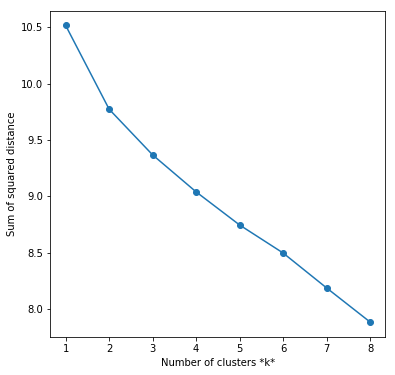

In [208]:
import matplotlib.pyplot as plt

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 9))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(madrid_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [209]:

# add clustering labels
mm = madrid_merged
mm['Cluster Labels'] = km.labels_


# create map of Toronto using latitude and longitude mean values
map_clusters = folium.Map(location=[mm.Latitude.mean(), mm.Longitude.mean()], 
                          zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mm['Latitude'], 
                                  mm['Longitude'], 
                                  mm['station'], 
                                  mm['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Boxplots

In [247]:
madrid_onehot_grouped_sum = madrid_onehot.groupby('station').sum().reset_index()
madrid_onehot_grouped_sum.head()

,station,Accessories Store,Adult Boutique,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,ACACIAS/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,AEROPUERTO T1 T2 T3/8,1,0,2,3,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AEROPUERTO T4/8,1,0,0,2,4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,"AGUILAS, LAS/C-5",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ALAMEDA DE OSUNA/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
ordered_columns = madrid_onehot_grouped_sum.sum()[1:].sort_values(ascending=False).index.to_list()
madrid_onehot_sorted = madrid_onehot_grouped_sum[['station'] + ordered_columns]

In [256]:
madrid_onehot_sorted.iloc[:,1:] = madrid_onehot_sorted.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [265]:
madrid_onehot_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
madrid_onehot_sorted.head()

,Cluster Labels,station,Spanish Restaurant,Restaurant,Bar,Tapas Restaurant,Hotel,Café,Coffee Shop,Plaza,...,Soup Place,Bubble Tea Shop,Bridal Shop,Lebanese Restaurant,Light Rail Station,Pool Hall,Beach,Fish & Chips Shop,Travel Lounge,Hawaiian Restaurant
0,4,ACACIAS/5,0.117647,0.000000,0.181818,0.200000,0.0000,0.166667,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,AEROPUERTO T1 T2 T3/8,0.000000,0.000000,0.000000,0.000000,0.0000,0.500000,0.166667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,AEROPUERTO T4/8,0.176471,0.000000,0.000000,0.000000,0.0625,0.000000,0.500000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"AGUILAS, LAS/C-5",0.176471,0.058824,0.272727,0.066667,0.0000,0.166667,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,ALAMEDA DE OSUNA/5,0.058824,0.117647,0.000000,0.066667,0.1250,0.000000,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
import seaborn as sns

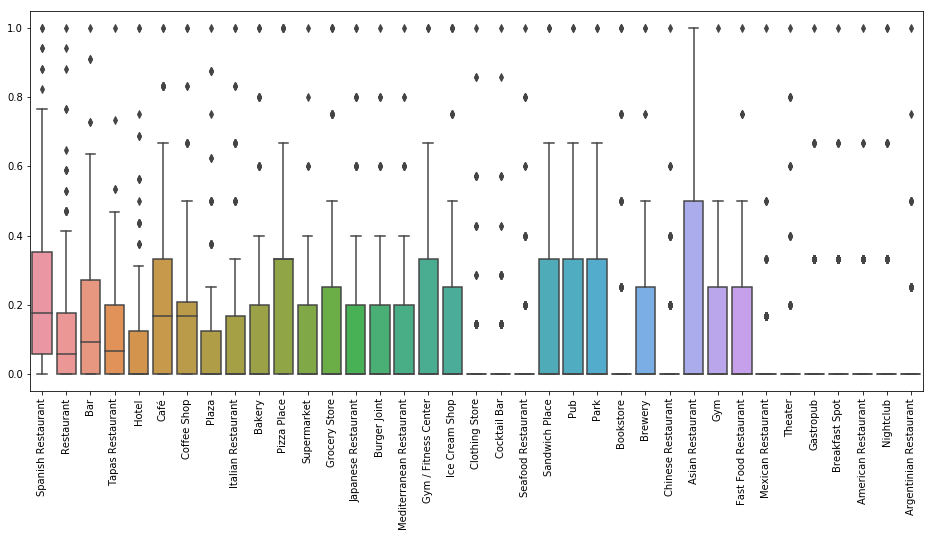

In [280]:
f, axes = plt.subplots(1, 1, figsize=(16, 7))
sns.boxplot(ax=axes,data=madrid_onehot_sorted.iloc[:,2:39])
plt.xticks(rotation=90)
plt.show()


We join the columns that are the same

In [292]:
#madrid_onehot_grouped_sum.head()
madrid_onehot_grouped_sum_refine = madrid_onehot_grouped_sum
madrid_onehot_grouped_sum_refine = madrid_onehot_grouped_sum_refine.drop(columns=['Spanish Restaurant',
                                               'Restaurant',
                                               'Café',
                                               'Coffee Shop',
                                               'Gym / Fitness Center',
                                               'Gym'])
madrid_onehot_grouped_sum_refine['Restaurant'] = madrid_onehot_grouped_sum['Spanish Restaurant'] +\
                                                madrid_onehot_grouped_sum['Restaurant']

madrid_onehot_grouped_sum_refine['Coffe Shop'] = madrid_onehot_grouped_sum['Café'] +\
                                                madrid_onehot_grouped_sum['Coffee Shop']

madrid_onehot_grouped_sum_refine['Gym'] = madrid_onehot_grouped_sum['Gym / Fitness Center'] +\
                                                madrid_onehot_grouped_sum['Gym']

In [293]:
#Sort new dataframe
ordered_columns = madrid_onehot_grouped_sum_refine.sum()[1:].sort_values(ascending=False).index.to_list()
madrid_onehot_sorted = madrid_onehot_grouped_sum_refine[['station'] + ordered_columns]

#normalize
madrid_onehot_sorted.iloc[:,1:] = madrid_onehot_sorted.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [296]:
madrid_onehot_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
madrid_onehot_sorted.head()

ValueError: cannot insert Cluster Labels, already exists

## Plot boxplots by cluster

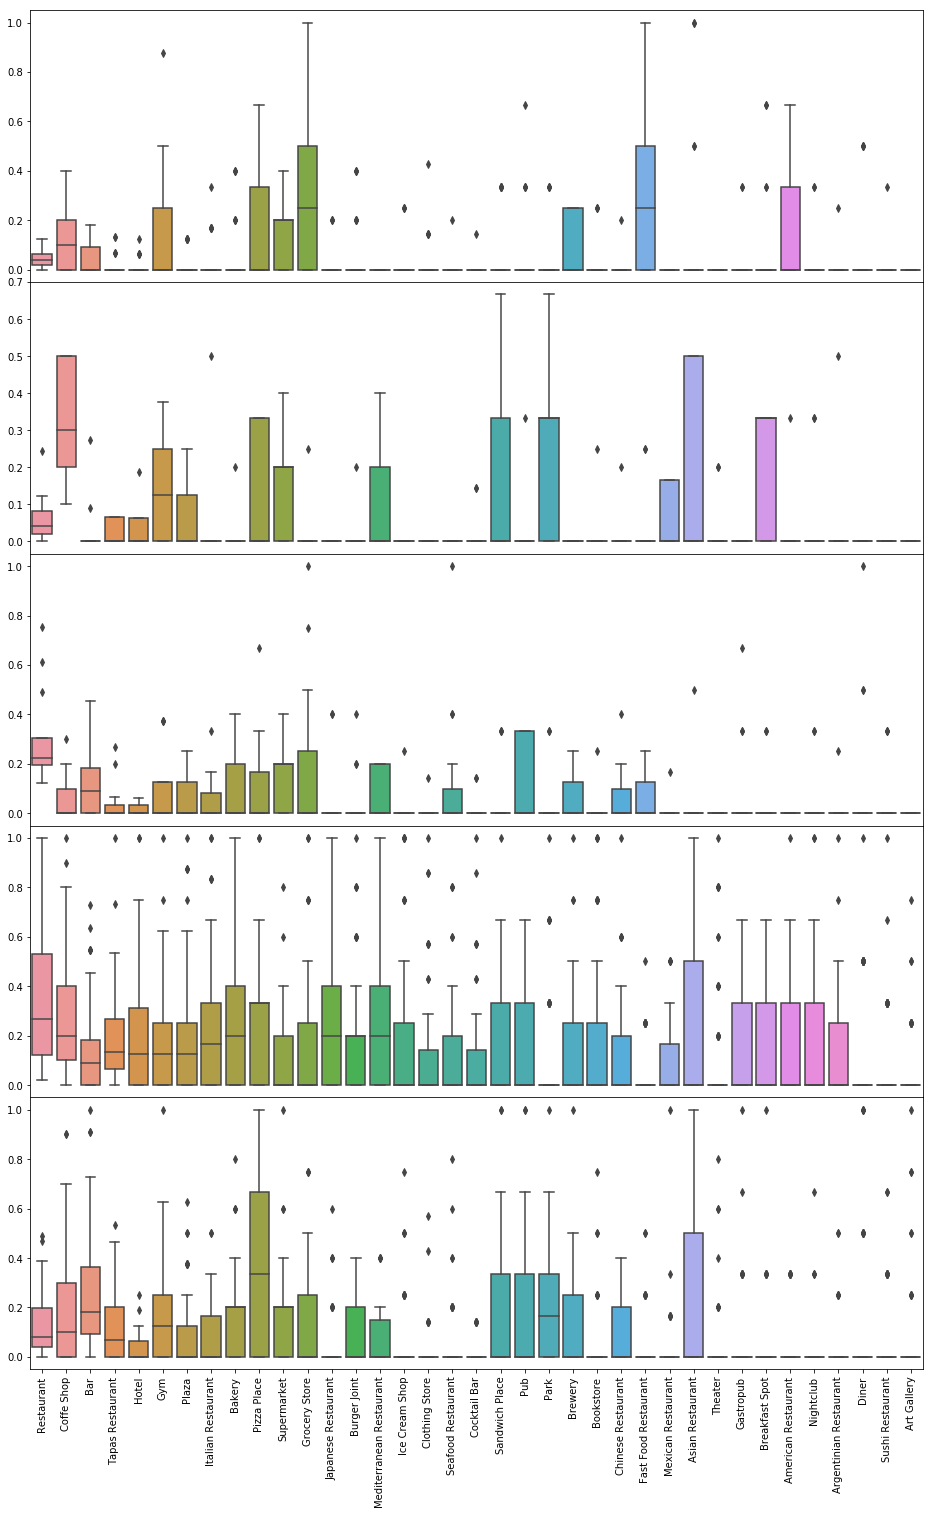

In [297]:
f, axes = plt.subplots(5, 1, figsize=(16, 25), sharex=True)
# Remove horizontal space between axes
f.subplots_adjust(hspace=0)

sns.boxplot(ax=axes[0],data=madrid_onehot_sorted[madrid_onehot_sorted['Cluster Labels'] == 0].iloc[:,2:39])
sns.boxplot(ax=axes[1],data=madrid_onehot_sorted[madrid_onehot_sorted['Cluster Labels'] == 1].iloc[:,2:39])
sns.boxplot(ax=axes[2],data=madrid_onehot_sorted[madrid_onehot_sorted['Cluster Labels'] == 2].iloc[:,2:39])
sns.boxplot(ax=axes[3],data=madrid_onehot_sorted[madrid_onehot_sorted['Cluster Labels'] == 3].iloc[:,2:39])
sns.boxplot(ax=axes[4],data=madrid_onehot_sorted[madrid_onehot_sorted['Cluster Labels'] == 4].iloc[:,2:39])

plt.xticks(rotation=90)
plt.show()